# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [9]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
#Print dimension
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [11]:
#Good Practice to assert to check if data is loaded properly 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_valid.shape[0] == y_valid.shape[0]), "The number of images is not equal to the number of labels."
assert(X_valid.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Visualize some sample images from training set  

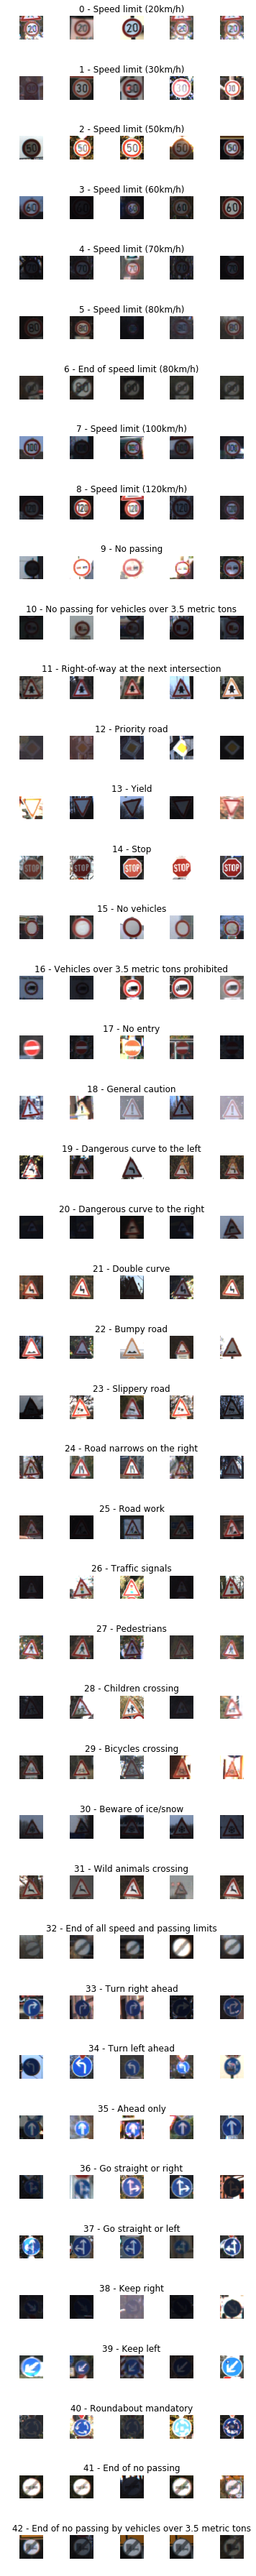

In [13]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

label_mapping_data = pd.read_csv('signnames.csv')
num_of_samples=[]
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in label_mapping_data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

Looking at the sample images, the following image characteristics are confirmed:

* The images comes in different sizes
* The darkness / brightness of those images are fairly random
* The images may be slightly rotated
* The images may not be facing straight
* The images may not be exactly centered

The firstand second point will be handled in the image pre-processing, and the remaining points will be handled in the image augmentation

In [14]:
#Mapping classids to traffic sign names
import csv
signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [15]:
# Plotting to view class label distribution
def histogram_plot(dataset, label):
    """
    Plots a histogram of the input data.
        Parameters:
            dataset: Input data to be plotted as a histogram.
            lanel: A string to be used as a label for the histogram.
    """
    hist, bins = np.histogram(dataset, bins=n_classes)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(label)
    plt.ylabel("Image count")
    plt.show()

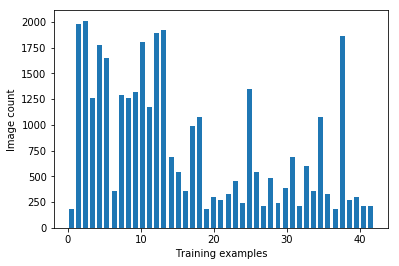

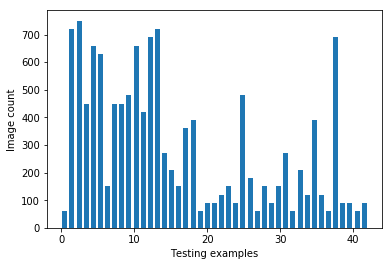

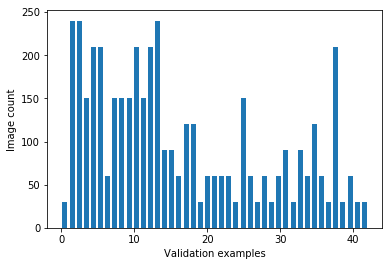

In [8]:
# Plotting histograms of the count of each sign
histogram_plot(y_train, "Training examples")
histogram_plot(y_test, "Testing examples")
histogram_plot(y_valid, "Validation examples")

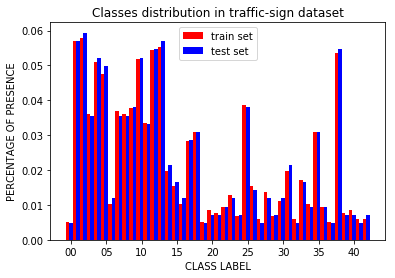

In [16]:
# bar-chart of classes distribution with respect to test
train_distribution, test_distribution = np.zeros(n_classes), np.zeros(n_classes)
for c in range(n_classes):
    train_distribution[c] = np.sum(y_train == c) / n_train
    test_distribution[c] = np.sum(y_test == c) / n_test
fig, ax = plt.subplots()
col_width = 0.5
bar_train = ax.bar(np.arange(n_classes), train_distribution, width=col_width, color='r')
bar_test = ax.bar(np.arange(n_classes)+col_width, test_distribution, width=col_width, color='b')
ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')
ax.set_title('Classes distribution in traffic-sign dataset')
ax.set_xticks(np.arange(0, n_classes, 5)+col_width)
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0]), ('train set', 'test set'))
plt.show()

#### Class Label distributed in both training and testing set

**Observations :**

* Data has strong imbalance among classes.
* Some are over represented and while other are less.
* Data distribution is almost same between training and test set.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Feature Pre-Processing 


(32, 32, 3)
36


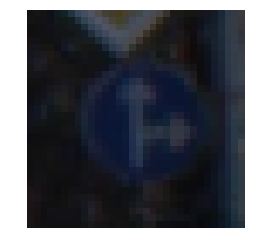

In [19]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Import Cv2 for image processing
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])


### Preprocessing techniques used and why these techniques were chosen

* **Shuffling** - Shuffle help the training data to increase randomness and variety in training dataset, in order for the model to be more stable. We will use sklearn to shuffle our data
* **Grayscaling** - Opencv to convert RGB image 3 to grayscale 1 channel.It helps process efficiency , increase ConvNet's accuracy .. Reference: [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) paper
* **EqualizeHist** - method used to adjust areas of lower local contrast to gain a higher contrast in images.It takes grayscale image as input. Function `cv2.equalizeHist(img)`
* **Normalize** - Normalization is a process that changes the range of pixel intensity values.This feature scaling is known to have beneficial effects on the gradient descent performed by the optimizer.



In [20]:
# Shuffling train dataset .. Good practise to always shuffle data 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [21]:
# Function to convert to grayscale input: RGB image output: Grayscale
def convert_grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img
# Function to adjust contrast input: Grayscale
def equalize_hist(img):
    img = cv2.equalizeHist(img)
    return img
# Function to normalize image pixel values input: equalizehist image output : Normalized image
def normalize_img(img):
    img = np.divide(img, 255)
    return img


In [22]:
# Function combining all preprocessing methods input RGB image output Normalized image
def img_preprocessing(img):
    img = convert_grayscale(img)
    img = equalize_hist(img)
    img = normalize_img(img)
    return img

(-0.5, 31.5, 31.5, -0.5)

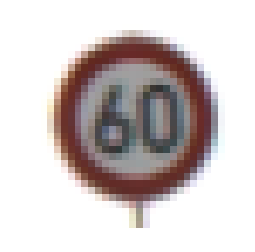

In [27]:
#Before applying pre processing step 
plt.imshow(X_train[1])
plt.axis("off")

(32, 32)


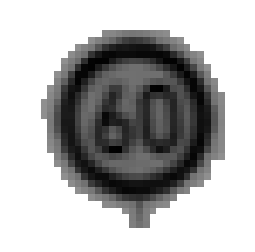

In [28]:
#After applying pre processing step
image = img_preprocessing(X_train[1])
plt.imshow(image,cmap="gray")
plt.axis("off")
print(image.shape)

In [29]:
# Applying Preprocessing step to Training , Testing and Validation dataset
X_train_norm = np.array(list(map(img_preprocessing, X_train)))
X_test_norm = np.array(list(map(img_preprocessing, X_test)))
X_valid_norm = np.array(list(map(img_preprocessing, X_valid)))

[[ 0.38431373  0.18039216  0.23529412 ...,  0.55294118  0.55294118
   0.58039216]
 [ 0.24313725  0.27058824  0.19215686 ...,  0.82745098  0.86666667
   0.88627451]
 [ 0.37647059  0.58039216  0.64313725 ...,  0.92156863  0.92156863
   0.88627451]
 ..., 
 [ 0.79607843  0.88627451  0.84705882 ...,  0.72156863  0.75686275
   0.67058824]
 [ 0.82745098  0.92156863  0.83921569 ...,  0.75686275  0.62745098
   0.49019608]
 [ 0.86666667  0.89411765  0.72156863 ...,  0.80392157  0.49411765
   0.43137255]]


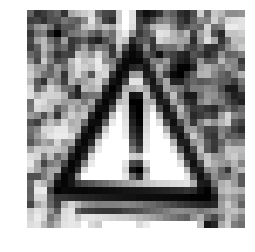

In [30]:
# Random checking whether preprocessing applied 
index = random.randint(0, len(X_train) - 1)
plt.imshow(X_train_norm[index],cmap="gray")
plt.axis('off')
print(X_train_norm[index])

In [31]:
#Reshaping 
X_train_norm = X_train_norm.reshape(34799, 32, 32, 1)
X_test_norm = X_test_norm.reshape(12630, 32, 32, 1)
X_valid_norm = X_valid_norm.reshape(4410, 32, 32, 1)

### Preparing data for Training 
* As our data is class imbalanced and best is to generate additional variety of data. 
* Using keras library, class: ImageDataGenerator - Process called Image Augmentation
    - Training images are randomly shift (width)
    - Training images are randomly shift (height)
    - Training images zoomed
    - Training images rotated in narrow range.
* Augmented data is displayed below sample 15   


Using TensorFlow backend.


(15, 32, 32, 1)


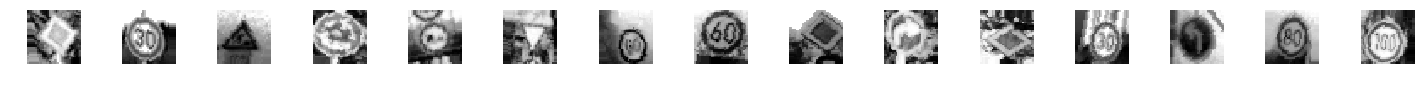

In [32]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=15.)
datagen.fit(X_train_norm)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train_norm, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32),cmap="gray")
    axs[i].axis("off")
 
print(X_batch.shape)


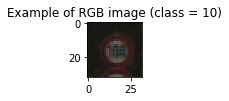

In [33]:
# Before Data generation
img = X_train[100]
# plot the original image
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.title('Example of RGB image (class = {})'.format(y_train[0]))
plt.show()

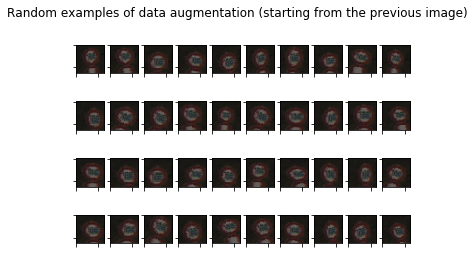

In [34]:
# After generating varieties of images for same RGB image
img = X_train[100]
# plot some randomly augmented images
rows, cols = 4, 10
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_img, _ = datagen.flow(np.expand_dims(img, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.suptitle('Random examples of data augmentation (starting from the previous image)')
plt.show()

### Model Architecture


1. LeNet-5

LeNet-5 is a convolutional network designed for handwritten and machine-printed character recognition. It was introduced by the famous Yann LeCun in his paper Gradient-Based Learning Applied to Document Recognition in 1998. Although this ConvNet is intended to classify hand-written digits, we're confident it have a very high accuracy when dealing with traffic signs, given that both hand-written digits and traffic signs are given to the computer in the form of pixel images.

**LeNet-5 architecture:**

This ConvNet follows these steps: Adding few convolution layers

Input => Convolution => ReLU => Convolution => RelU => Pooling => Convolution => ReLU=> Convolution => ReLU  => Pooling =>Flatten => FullyConnected => ReLU =>dropout => FullyConnected => Relu => dropout => FullyConnected

Input => Shape 32x32x1

Layer 1 (Convolutional): The output shape should be 28x28x60.

Activation : Relu

Layer 2 (Convolutional): The output shape should be 24x24x60.

Activation : Relu

Pooling 1 : The output shape should be 12x12x60.

Layer 3 (Convolutional): The output shape should be 10x10x30.

Activation : Relu

Layer 4 (Convolutional): The output shape should be 8x8x30.

Activation : Relu

Pooling. The output shape should be 4x4x30.

Flattening: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D input shape 480 (4x4x30).

Dense Layer 1 (Fully Connected): This should have 500 outputs.

Activation : Relu

Dropout layer 1

Dense Layer 2 (Fully Connected): This should have 100 outputs.

Activation : Relu

Dropout layer 2

Dense Layer 3 (Fully Connected): This should have 43 outputs.


Layer |	Shape
----- | -----
Input |	32x32x3
Convolution (valid, 5x5x60),Activation (RelU)|28x28x60
Convolution (valid, 5x5x60),Activation (RelU)|24X24X60
Max Pooling (valid, 2x2)|12x12x30
Convolution (valid, 3x3x60),Activation (RelU)|10x10x30
Convolution (valid, 3x3x60),Activation (RelU)|8X8X30
Max Pooling (valid, 2x2)|4x4x30
Flatten|480
Dense(Activation (ReLU)) |500
dropout|-
Dense(Activation(Relu))|100
dropout|-
Dense	|43
Activation (Softmax)|	43

In [75]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x60.
    conv1_W = tf.Variable(tf.truncated_normal(shape=[5,5,1,60], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(60))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2 : Convoluntional. Input = 28x28x60. Output = 24x24x60
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5,5,60,60], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(60))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2) 

    # Maxpool layer 1 : Pooling. Input = 24x24x60. Output = 12x12x60.
    pool1 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Layer 3: Convolutional. Input = 12x12x60. Output = 10x10x30.
    conv3_W = tf.Variable(tf.truncated_normal(shape=[3,3,60,30], mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(30))
    conv3   = tf.nn.conv2d(pool1, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3   = tf.nn.relu(conv3)
    
    # Layer 4 : Convoluntional. Input = 10x10x30. Output = 8x8x30
    conv4_W = tf.Variable(tf.truncated_normal(shape=[3,3,30,30], mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(30))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4   = tf.nn.relu(conv4)
    
    # Maxpool layer 2  Input = 8x8x30. Output = 4x4x30.
    pool2 = tf.nn.max_pool(conv4,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
       
    # Flatten. Input = 4x4x30. Output = 480.
    fc0 = flatten(pool2)
    
    # Dense Layer 1: Fully Connected. Input = 480. Output = 500.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(480, 500), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(500))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    # Dropout layer
    drop1 = tf.nn.dropout(fc1, keep_prob=0.3)
    
    # Dense layer 2 : Fully connected. Input = 500 output = 100
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(500, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(drop1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    
    # Dropout layer
    drop2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # Dense layer 2: Fully Connected. Input = 500. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop2, fc3_W) + fc3_b
    
    return logits




In [39]:
# Placeholders
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [40]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
network_output = tf.nn.softmax(logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [41]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCHSIZE):
        batch_x, batch_y = X_data[offset:offset+BATCHSIZE], y_data[offset:offset+BATCHSIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [53]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
BATCHSIZE = 100
EPOCHS = 10
BATCHES_PER_EPOCH = 2000

In [54]:
# start training
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    train_accuracy = []
    val_accuracy = []
    print("Training...")
    for epoch in range(EPOCHS):

        print("EPOCH {} ...".format(epoch + 1))

        batch_counter = 0
        for batch_x, batch_y in datagen.flow(X_train_norm, y_train, batch_size=BATCHSIZE):

            batch_counter += 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            if batch_counter == BATCHES_PER_EPOCH:
                break

        # at epoch end, evaluate accuracy on both training and validation set
        #train_accuracy = evaluate(X_train_norm, y_train)
        #val_accuracy = evaluate(X_valid_norm, y_valid)
        train_accuracy.append(evaluate(X_train_norm, y_train))
        val_accuracy.append(evaluate(X_valid_norm, y_valid))
        print('Train Accuracy = {:.3f} - Validation Accuracy: {:.3f}'.format(train_accuracy[-1], val_accuracy[-1]))
        print()
        # log current weights
       # checkpointer.save(sess, save_path='../checkpoints/traffic_sign_model.ckpt', global_step=epoch)
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Train Accuracy = 0.865 - Validation Accuracy: 0.839

EPOCH 2 ...
Train Accuracy = 0.954 - Validation Accuracy: 0.944

EPOCH 3 ...
Train Accuracy = 0.979 - Validation Accuracy: 0.970

EPOCH 4 ...
Train Accuracy = 0.985 - Validation Accuracy: 0.978

EPOCH 5 ...
Train Accuracy = 0.990 - Validation Accuracy: 0.979

EPOCH 6 ...
Train Accuracy = 0.991 - Validation Accuracy: 0.980

EPOCH 7 ...
Train Accuracy = 0.993 - Validation Accuracy: 0.980

EPOCH 8 ...
Train Accuracy = 0.994 - Validation Accuracy: 0.988

EPOCH 9 ...
Train Accuracy = 0.994 - Validation Accuracy: 0.988

EPOCH 10 ...
Train Accuracy = 0.996 - Validation Accuracy: 0.987

Model saved


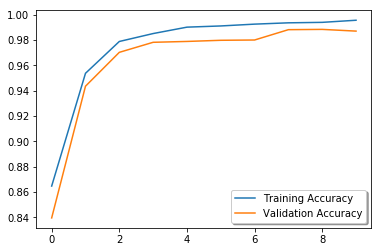

In [55]:
fig, ax = plt.subplots()
ax.plot(train_accuracy, label='Training Accuracy')
ax.plot(val_accuracy, label='Validation Accuracy')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [56]:
# Function to print confusion_matrix
def print_confusion_matrix(cm, sign_names=signs):
    results = [(i, sign_names[i], row[i]/sum(row)*100) for i, row in enumerate(cm)]
    accuracies = []
    for result in sorted(results, key=lambda x: -x[2]):
        print('{:>2} {:<50} {:6.2f}% {:>4}'.format(*result, sum(y_train==result[0])))
        accuracies.append(result[2])
    print('-'*50)
    print('Accuracy: Mean: {:.3f} Std: {:.3f}'.format(np.mean(accuracies), np.std(accuracies)))

#### Observations  Train set vs Validation set :

* Train Accuracy - 0.996
* Validation Accuracy - 0.987

The performance improved. The training accuracy is slightly higher than the validation accuracy. It might be a sign of overfitting but As the difference is negligible I m okey with it.

I could have tried changing layer by layer but changing all three did work so I'm ok with this.

The confusion matrix's mean accuracy is the sum of the mean accuracy for each class divided by the number of class. It is lower than overall accuracy indicating the larger classes are performing better (or the smaller classes are performing worse)

* Mean accuracy - 98.2%


INFO:tensorflow:Restoring parameters from ./lenet
Model restored.
Confusion matrix, without normalization
[[ 29   0   0 ...,   0   0   0]
 [  0 238   1 ...,   0   0   0]
 [  0   0 238 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  60   0   0]
 [  0   0   0 ...,   0  25   0]
 [  0   0   0 ...,   0   0  30]]
 4 Speed limit (70km/h)                               100.00% 1770
 7 Speed limit (100km/h)                              100.00% 1290
 9 No passing                                         100.00% 1320
10 No passing for vehicles over 3.5 metric tons       100.00% 1800
11 Right-of-way at the next intersection              100.00% 1170
14 Stop                                               100.00%  690
17 No entry                                           100.00%  990
18 General caution                                    100.00% 1080
19 Dangerous curve to the left                        100.00%  180
22 Bumpy road                                         100.00%  330
26 Traffic signals      

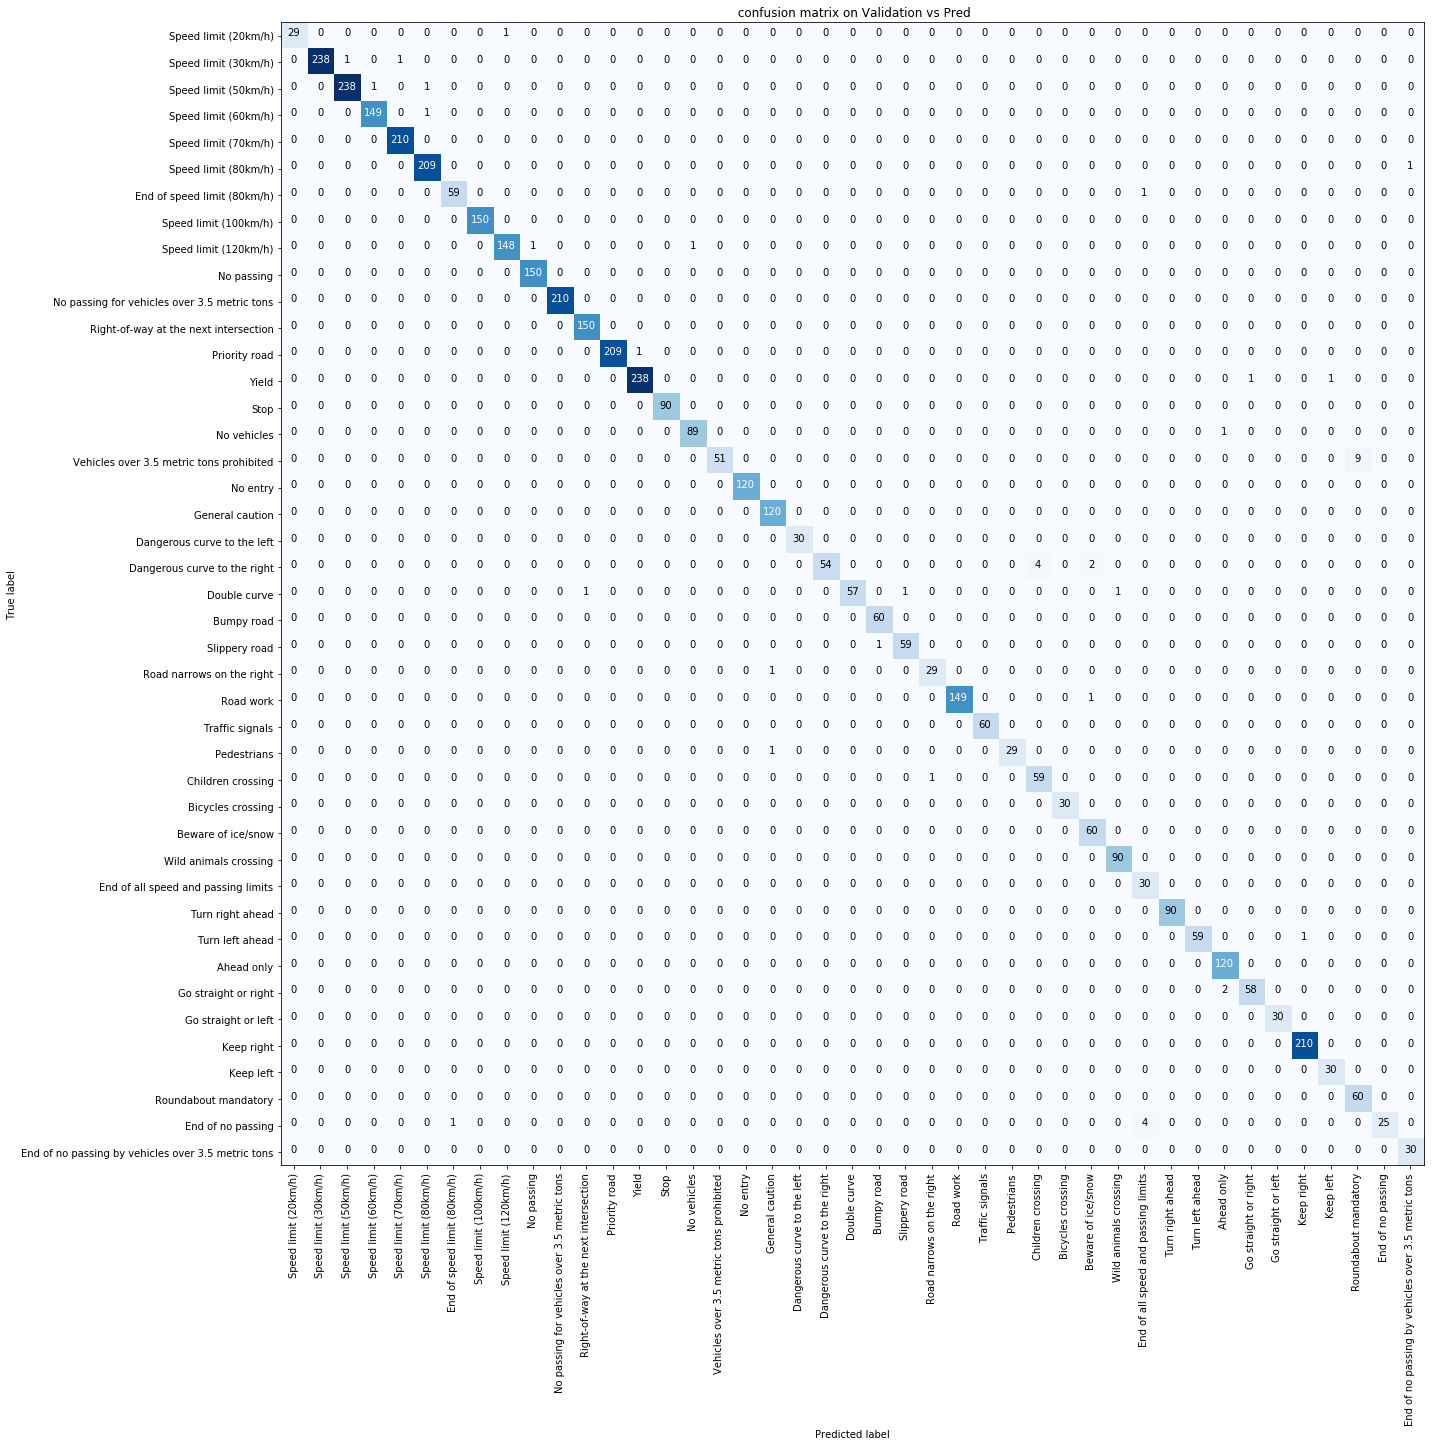

In [57]:
# Function to plot Confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

"""
Ref : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    print("Model restored.")
    logits_1 = sess.run(network_output, feed_dict={x: X_valid_norm, y: y_valid, keep_prob: 1.0})
    y_pred = np.argmax(logits_1,axis=1)
cnf_matrix = confusion_matrix(y_valid, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=signs, title=' confusion matrix on Validation vs Pred')
print_confusion_matrix(cnf_matrix)

In [59]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.971


#### Observations  Train set vs Test set :

* **Test Accuracy - 0.97**

Model is performing better.

except few classes all other percentage accuracy greater than 90%

                                  
> 6 End of speed limit (80km/h)                          88.00%  360

> 42 End of no passing by vehicles over 3.5 metric tons  86.67%  210

> 22 Bumpy road                                          82.50%  330

> 30 Beware of ice/snow                                  80.67%  390

> 27 Pedestrians                                         73.33%  210


INFO:tensorflow:Restoring parameters from ./lenet
Model restored.
Confusion matrix, without normalization
[[ 56   1   0 ...,   0   0   0]
 [  0 715   1 ...,   0   0   0]
 [  0   1 747 ...,   0   0   0]
 ..., 
 [  0   1   0 ...,  86   0   0]
 [  0   0   0 ...,   0  58   0]
 [  0   0   0 ...,   0  11  78]]
16 Vehicles over 3.5 metric tons prohibited           100.00%  360
19 Dangerous curve to the left                        100.00%  180
28 Children crossing                                  100.00%  480
32 End of all speed and passing limits                100.00%  210
33 Turn right ahead                                   100.00%  599
34 Turn left ahead                                    100.00%  360
35 Ahead only                                         100.00% 1080
37 Go straight or left                                100.00%  180
12 Priority road                                       99.71% 1890
14 Stop                                                99.63%  690
 2 Speed limit (50km/h) 

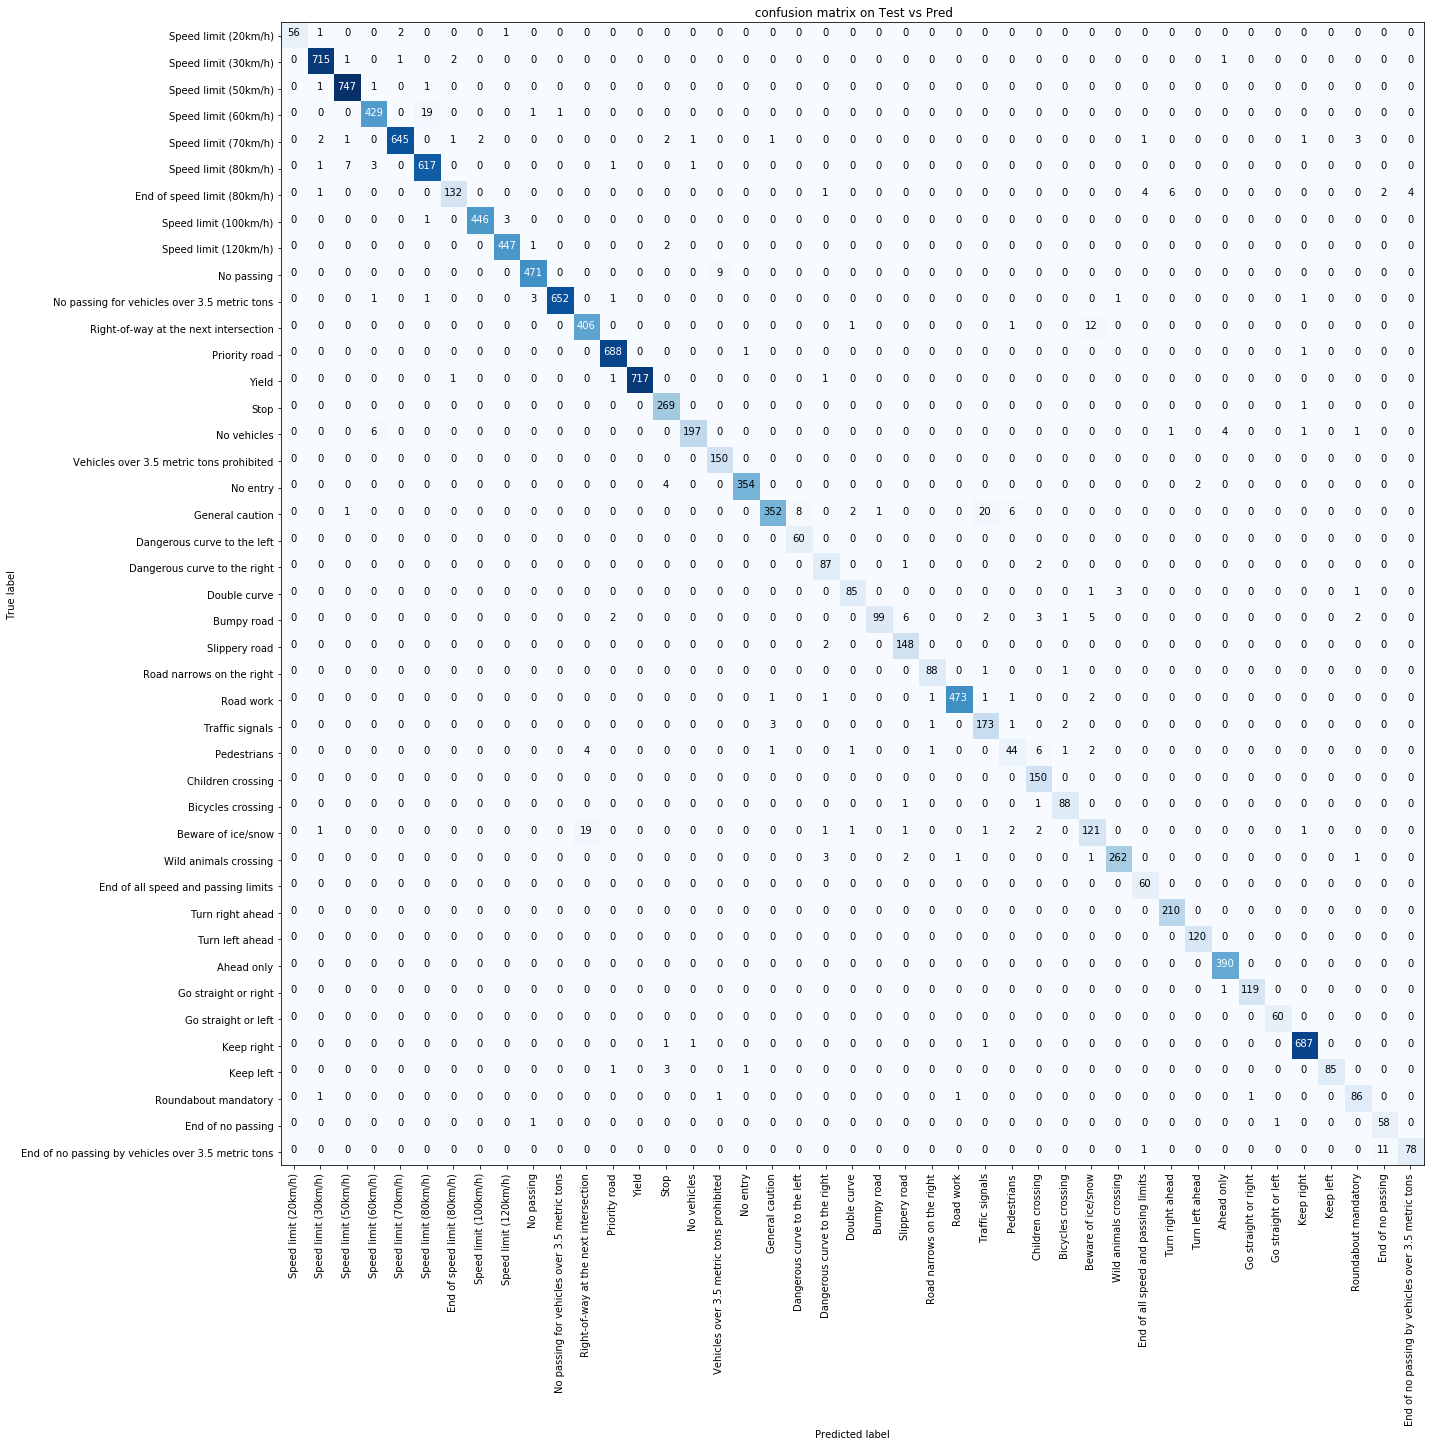

In [58]:

import itertools
from sklearn.metrics import confusion_matrix

"""
Ref : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    print("Model restored.")
    logits_2 = sess.run(network_output, feed_dict={x: X_test_norm, y: y_test, keep_prob: 1.0})
    y_pred = np.argmax(logits_2,axis=1)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=signs, title=' confusion matrix on Test vs Pred')
print_confusion_matrix(cnf_matrix)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [60]:
import os
path = './New_test_images1/'
images = os.listdir(path)
images

['001.jpg', '002.jpg', '004.jpg', '003.jpg', '005.jpg']

In [67]:
# Loading and resizing new test images
new_test_images = []
path = './New_test_images1/'
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_test_images.append(img)
new_IDs = [1,34,13,23,29]
print("Number of new testing examples: ", len(new_test_images))

Number of new testing examples:  5


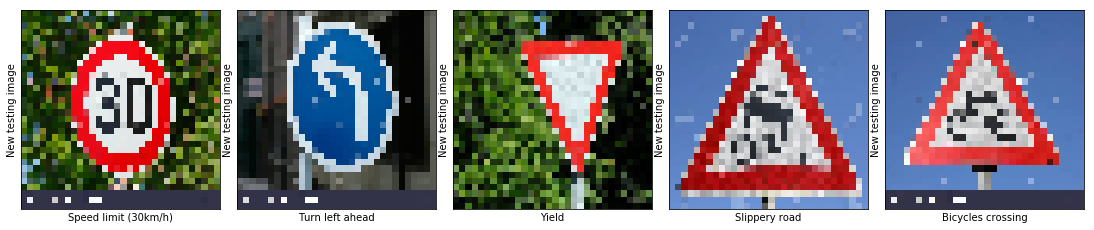

In [45]:
plt.figure(figsize=(15, 16))
for i in range(len(new_test_images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_test_images[i])
    plt.xlabel(signs[new_IDs[i]])
    plt.ylabel("New testing image")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.show()

 **New Images from Web downloaded and stored at location** [Newimages](./New_test_images1/)

In [68]:
# New test data preprocessing
new_test_images_preprocessed = np.array(list(map(img_preprocessing, new_test_images)))

In [69]:
new_test_images_preprocessed = (new_test_images_preprocessed).reshape(-1, 32, 32, 1)

In [70]:
new_test_images_preprocessed.shape

(5, 32, 32, 1)

### Predict the Sign Type for Each Image

In [72]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# first things first: feature preprocessing

with tf.Session() as sess:

    # restore saved session
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    # predict on unseen images
    prediction = np.argmax(np.array(sess.run(logits, feed_dict={x: new_test_images_preprocessed, keep_prob: 1.})), axis=1)

for i, pred in enumerate(prediction):
    print('Image {} - Target = {:02d}, Predicted = {:02d}'.format(i, new_IDs[i], pred))
    
print('> Model accuracy: {:.02f}'.format(np.sum(new_IDs==prediction)/len(new_IDs)))

INFO:tensorflow:Restoring parameters from ./lenet
Image 0 - Target = 01, Predicted = 01
Image 1 - Target = 34, Predicted = 34
Image 2 - Target = 13, Predicted = 13
Image 3 - Target = 23, Predicted = 23
Image 4 - Target = 29, Predicted = 29
> Model accuracy: 1.00


### Analyze Performance

**Model is doing good on new images with accuracy 100%**.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
New Images Test Accuracy = 100.0%


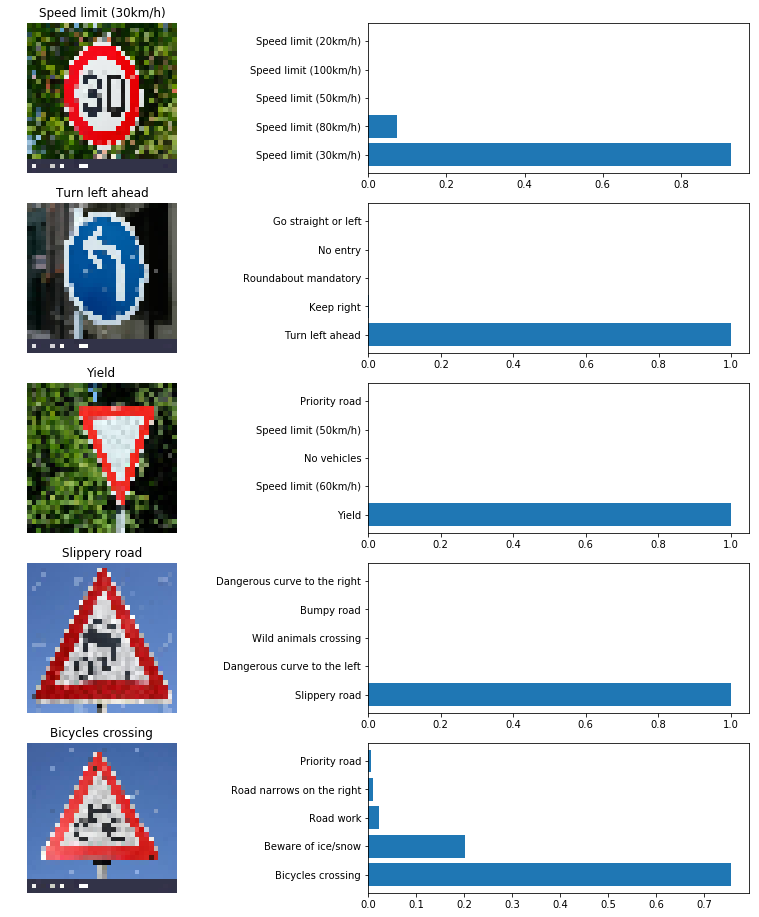

In [74]:
def y_predict_model(Input_data, top_k=5):
    """
    Generates the predictions of the model over the input data, and outputs the top softmax probabilities.
        Parameters:
            X_data: Input data.
            top_k (Default = 5): The number of top softmax probabilities to be generated.
    """
    num_examples = len(Input_data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                             feed_dict={x:Input_data, keep_prob:1.})
    return y_prob, y_pred

y_prob, y_pred = y_predict_model(new_test_images_preprocessed)

test_accuracy = 0
for i in enumerate(new_test_images_preprocessed):
    accu = new_IDs[i[0]] == np.asarray(y_pred[i[0]])[0]
    if accu == True:
        test_accuracy += 0.2
print("New Images Test Accuracy = {:.1f}%".format(test_accuracy*100))

plt.figure(figsize=(15, 16))
for i in range(len(new_test_images_preprocessed)):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(new_test_images[i]) 
    plt.title(signs[y_pred[i][0]])
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), y_prob[i, :])
    labels = [signs[j] for j in y_pred[i]]
    plt.yticks(np.arange(1, 6, 1), labels)
plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation,activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob :1.})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
for i in range(len(new_IDs)):
    plt.figure(figsize=(1,1))
    plt.imshow(new_test_images[i])
    plt.show()
    outputFeatureMap(new_test_images_preprocessed[i:i+1,:,:,:],conv1)
    plt.show()
    outputFeatureMap(new_test_images_preprocessed[i:i+1,:,:,:],conv2)
    plt.show()